In [5]:
#Importing the libraries that we will be using. 
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import osmnx as ox
import contextily as ctx 

### Table B19301, "Per Capita income", is simply the value for B19313 "Aggregate Income" divided by the total population estimate for the summary geography.

In [6]:
#importing geojson file with income/census tract.
income=gpd.read_file('Files for week 3/acs2019_5yr_B19301_14000US06037222001-Copy1.geojson')

In [7]:
#The next two commands give us a good idea of how the data is organized.
income.tail(10)

,geoid,name,B19301001,"B19301001, Error",geometry
995,14000US06037980020,"Census Tract 9800.20, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.34412 34.21700, -118.3438..."
996,14000US06037980021,"Census Tract 9800.21, Los Angeles, CA",28094.0,11430.0,"MULTIPOLYGON (((-118.40183 34.26509, -118.4017..."
997,14000US06037980022,"Census Tract 9800.22, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.50266 34.30809, -118.5026..."
998,14000US06037980023,"Census Tract 9800.23, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.64870 34.23120, -118.6480..."
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",55621.0,13470.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",14642.0,17593.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",9255.0,6115.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",35261.0,271.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [8]:
income=income.drop([1004])

In [9]:
income.shape

(1004, 5)

In [10]:
#Let's rename the columns to make them more identifiable.
income.columns=['Census_Tract', 'Friendly Font', 'PCI', 'Margin of Error', 'geometry']

In [11]:
#testing to make sure it was named
income.head()

,Census_Tract,Friendly Font,PCI,Margin of Error,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",29457.0,3651.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",45515.0,6571.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",21726.0,3829.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",23545.0,3092.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",37189.0,3899.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [12]:
income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1004 entries, 0 to 1003
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Census_Tract     1004 non-null   object  
 1   Friendly Font    1004 non-null   object  
 2   PCI              997 non-null    float64 
 3   Margin of Error  997 non-null    float64 
 4   geometry         1004 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 47.1+ KB


In [13]:
#Pulling the columns that we need
income_tracts=income[['PCI','geometry']]

In [14]:
income_tracts.head()

,PCI,geometry
0,29457.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,45515.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,21726.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,23545.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,37189.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [15]:
#Getting some basic stats
income['PCI'].describe()

count       997.000000
mean      36324.083250
std       25601.626129
min        6220.000000
25%       18620.000000
50%       26981.000000
75%       46742.000000
max      157392.000000
Name: PCI, dtype: float64

<AxesSubplot:ylabel='Frequency'>

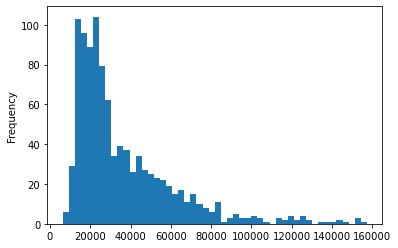

In [16]:
#Getting a visual to see how the data is distributed.
income['PCI'].plot.hist(bins=50)

Looks like the majority of PCI in the county leans towards the lower side of the income scale...

<AxesSubplot:>

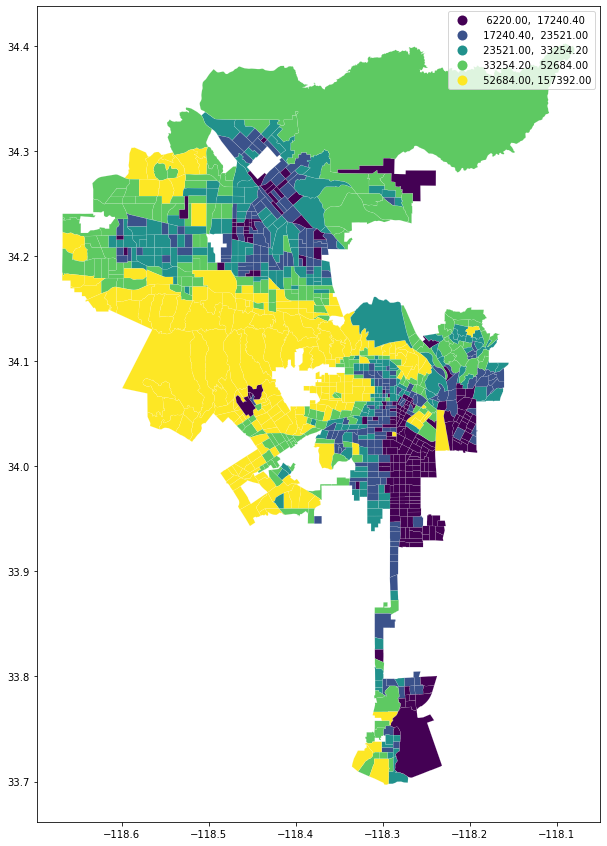

In [22]:
#Creating definitions for income levels based on breaks provided by census bureau, 
#and accounting for the fact that the majority of census tracts fall between 10k-36k income 
#per capita.
income.plot(figsize=(20,15),
            column='PCI',
            legend=True,
            scheme='quantiles', # to use custom breaks
            edgecolor='white', 
            linewidth=.1,
           )

OKAY, I've been trying for hours to get the colors to appear more accurately. 
It's supposed to look like this: https://censusreporter.org/data/map/?table=B19301&geo_ids=16000US0644000,140|16000US0644000&primary_geo_id=16000US0644000.

I've tried my best,your understanding is appreciated :)
Please let me know if I'm missing anything. I've restarted my machine several times. I didn't try merging any file, because the json file I got from census reporter had all the information I needed. This week was especially difficult because I wasn't able to catch the lab when it was live due to a scheduling conflict. I really do feel like the lack of class prevented me from doing my best on this assignment. I hope you can take that into account when grading--I work two jobs and am taking a full load of classes, so I wasn't able to watch the lab until much later. Otherwise, I would have caught ya'll at office hours. 

Text(0.5, 1.0, 'Per Capita Income in Los Angeles')

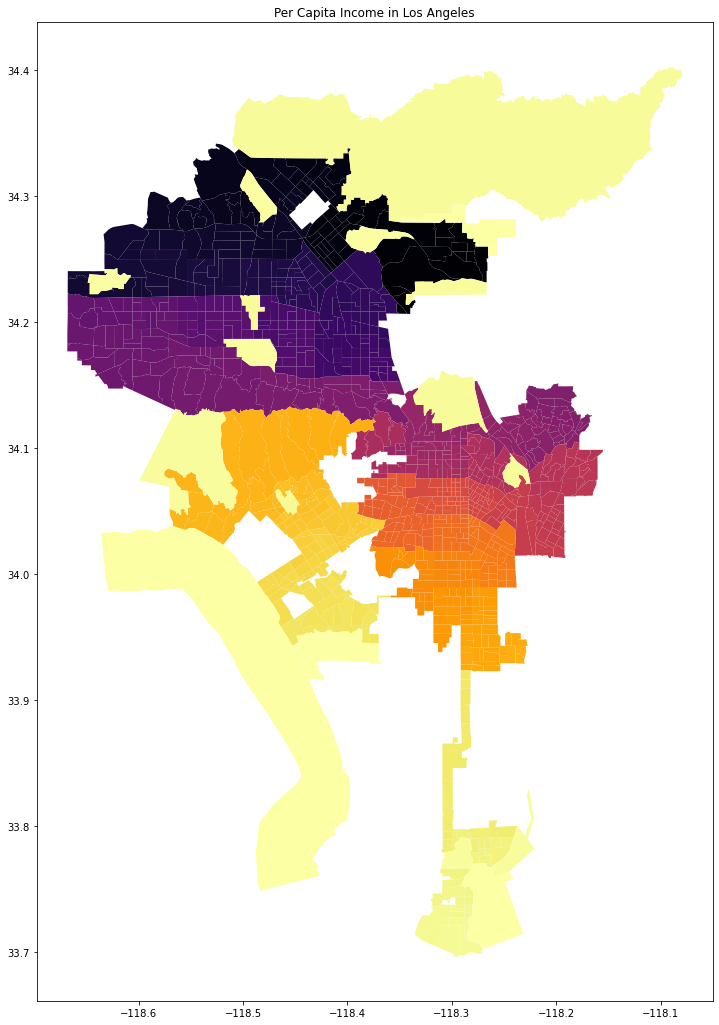

In [20]:
map = fig, ax = plt.subplots(figsize=(18,18))

# create the map plot
income.plot(ax=ax,
         cmap='inferno',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

# add a title
ax.set_title('Per Capita Income in Los Angeles')

In [19]:
map.save_to_html(file_name='la_arrests.html',read_only=True)

AttributeError: 'tuple' object has no attribute 'save_to_html'